# Atividade : Elementos Visuais
**M12-FUNDAMENTOS DA DESCOBERTA DE DADOS**

Abaixo temos um dataframe com as seguintes informações:

* **Nome:** O nome de cada indivíduo da base
* **Idade:** A idade de cada um deles
* **Profissão:** A atual ocupação
* **Salário:** O salário registrado
* **Limite de crédito:** O limite de crédito disponível para cada um dos indivíduos
* **Historico_Inadimplencia:** Marco como 0 aqueles que nunca tiveram um histórico de inadimplência e como 1 aqueles que já tiveram em algum momento.
* **Estado civil:** O estado civil de cada um deles
* **Imovel_Proprio:** Marcado como 0 aqueles que não tem imóvel próprio e como 1 aqueles que tem.

A proposta da atividade é que utilizem os dados do DataFrame e escolham apenas 3 gráficos que ajudem vocês a **identificar quais fatores são os principais impulsionadores para aqueles que tem limite de crédito alto**.

Durante a exploração de vocês podem utilizar mais de 3 gráficos mas deixem na entrega final apenas os 3 mais assertivos que contenham a informação da mensagem que querem passar, fiquem livres para utilizar as bibliotecas que quiserem para os gráficos.

Justifiquem a escolha dos visuais e despertem o lado analítico de vocês com uma análise acerca do descoberto através dos gráficos. Lembrem o que aprendemos na aula, devemos ser assertivos na nossa mensagem.

## Objetivos: Identificar váriaveis que impulsionem o limite de crédito. 

### Modificação no conjunto de dados original
1. Os valores das colunas Salário e Limite_Crédito, originalmente representados como strings numéricas, foram convertidos para um formato numérico apropriado
2. Foram criadas novas variáveis categóricas a partir das colunas originais. Para a coluna Histórico de Inadimplência, foram geradas as variáveis Bom Pagador e Inadimplência. A coluna Imóvel Próprio foi transformada nas variáveis Com Imóvel e Sem Imóvel. Por fim, a variável Estado Civil foi representada pelas categorias Casado e Solteiro. As colunas originais foram descartadas

### Pré-avaliação

De posse disso, foi construído um mapa de calor da matriz de correlação utilizando as seguintes variáveis: Idade, Salário, Sem Imóvel, Com Imóvel, Bom Pagador, Inadimplência, Casado, Solteiro e Limite de Crédito. Essa análise possibilitou a identificação de padrões e relações entre as variáveis. 
* **Correlação positiva com limite de crédito** : Idade, Salário, ter imovel,Bom Pagador, Casado
* **Correlação Inversa  com limite de crédito** : Sem Imovel,Inadiplencia, Solteiro




In [217]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import matplotlib as mpl

import seaborn as sns


In [137]:

data = {
    'Nome': ['Alice', 'Joao', 'Charlie', 'David', 'Eva', 'Diego', 'Denize', 'Claudio'],
    'Idade': [25, 30, 35, 40, 45, 60, 22, 24],
    'Profissao': ['Engenheiro', 'Médico', 'Professor', 'Advogado', 'Médico','Engenheiro', 'Estudante','Estudante'],
    'Salario': ['4500', '8000', '5000', '10000', '12000','15000', '1200','1500'],
    'Limite_Credito': ['2500', '4000', '4000', '1000', '10000','2000', '500','250'],
    'Historico_Inadimplencia': ['0', '0', '0', '1', '0','1', '0','1'],
    'Estado_Civil': ['Casamento', 'Casamento', 'Solteiro', 'Solteiro', 'Casamento','Solteiro', 'Solteiro','Solteiro'],
    'Imovel_Proprio': ['0', '0', '0', '1', '1','1', '0','0']
}

df = pd.DataFrame(data)
df['Salario']=df['Salario'].astype(float)
df['Limite_Credito']=df['Limite_Credito'].astype(float)
df['Historico_Inadimplencia']=df['Historico_Inadimplencia'].astype(int)

dfo=df  #dataset original


df=pd.concat([df,pd.get_dummies(df['Imovel_Proprio'],prefix='Imovel_Proprio')],axis=1)
df=pd.concat([df,pd.get_dummies(df['Historico_Inadimplencia'],prefix='Inadimplencia')],axis=1)
df=pd.concat([df,pd.get_dummies(df['Estado_Civil'],prefix='Estado_Civil')],axis=1)

#remoção da colunas binárias
#df.drop(columns=['Historico_Inadimplencia','Estado_Civil','Imovel_Proprio'], inplace=True)

df.rename(columns={'Imovel_Proprio_0': 'Sem Imovel', 
                   'Imovel_Proprio_1': 'Com Imovel',
                   'Inadimplencia_0': 'Bom Pagador',
                   'Inadimplencia_1': 'Inadimplencia',
                   'Estado_Civil_Casamento': 'Casado',
                   'Estado_Civil_Solteiro': 'Solteiro'
                  
                  
                  }, inplace=True)
#df

,Nome,Idade,Profissao,Salario,Limite_Credito,Historico_Inadimplencia,Estado_Civil,Imovel_Proprio,Sem Imovel,Com Imovel,Bom Pagador,Inadimplencia,Casado,Solteiro
0,Alice,25,Engenheiro,4500.0,2500.0,0,Casamento,0,1,0,1,0,1,0
1,Joao,30,Médico,8000.0,4000.0,0,Casamento,0,1,0,1,0,1,0
2,Charlie,35,Professor,5000.0,4000.0,0,Solteiro,0,1,0,1,0,0,1
3,David,40,Advogado,10000.0,1000.0,1,Solteiro,1,0,1,0,1,0,1
4,Eva,45,Médico,12000.0,10000.0,0,Casamento,1,0,1,1,0,1,0
5,Diego,60,Engenheiro,15000.0,2000.0,1,Solteiro,1,0,1,0,1,0,1
6,Denize,22,Estudante,1200.0,500.0,0,Solteiro,0,1,0,1,0,0,1
7,Claudio,24,Estudante,1500.0,250.0,1,Solteiro,0,1,0,0,1,0,1


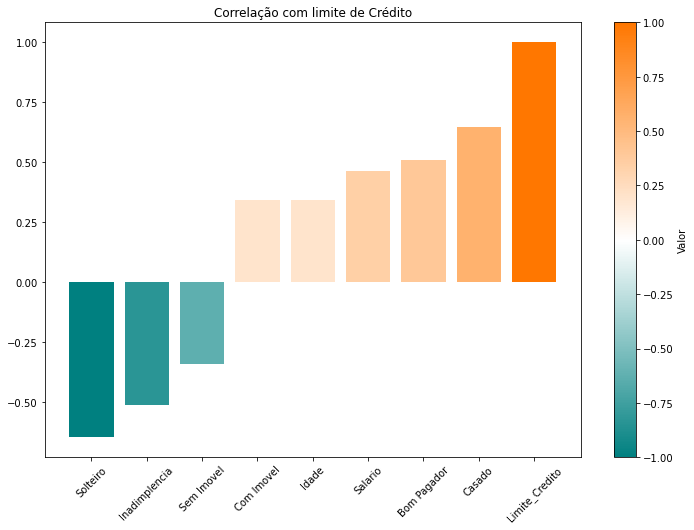

In [237]:
#Pergunta: Quais são as variaveis mais significativas para o limite de crédito.

#Definição padrão de cor
teal_orange = LinearSegmentedColormap.from_list("TealOrange", ["#008080", "#FFFFFF", "#FF7700"])
cmap = plt.get_cmap(teal_orange)

val=correlacao['Limite_Credito'].sort_values()
# Normalizando os valores para o intervalo [-1, 1]
norm = mpl.colors.Normalize(vmin=-1, vmax=1)
scaled_values = [2 * (v - min(val)) / (max(val) - min(val)) - 1 for v in val]


plt.figure(figsize=(12, 8))
plt.bar(val.index, val,color=cmap(norm(scaled_values)))
plt.title('Correlação com limite de Crédito')
plt.xticks(rotation=45)
corr_line.sort_values(by="Limite_Credito",axis=1)
plt.colorbar(plt.cm.ScalarMappable(cmap=cmap, norm=norm), label='Valor')




3.5483870967741935

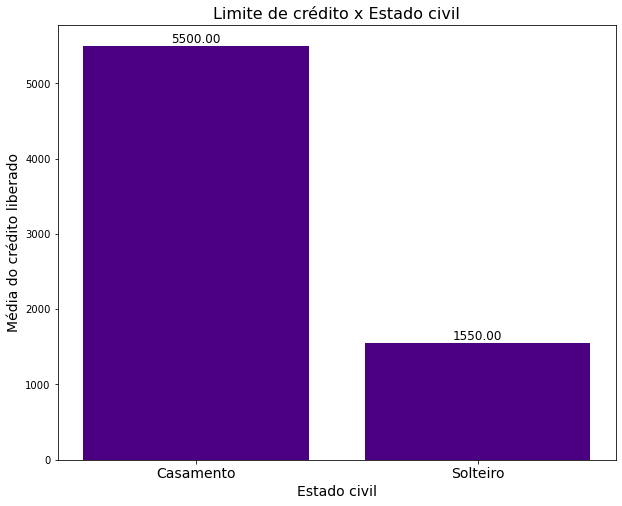

In [138]:
#Agrupamentos utilizando datasetoriginal 
#limites de crédidos com estado civil,inadimplecina e salário. 
#Em média, qual a diferença entes esses grupos?
estado_civil= df.groupby('Estado_Civil')['Limite_Credito'].mean()
inadimplencia= df.groupby('Historico_Inadimplencia')['Limite_Credito'].mean()

salario= df.groupby('Salario')['Limite_Credito'].mean()
#Inadiplencia_salario= dfo.groupby('Salario')['Historico_Inadimplencia'].mean()


# Criando o gráfico de barras
fig, ax = plt.subplots(figsize=(10, 8))

bars = ax.bar(estado_civil.index, estado_civil, color='indigo')
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval + 0.3,  # Ajuste do valor no topo
            f'{yval:.2f}', ha='center', va='bottom', fontsize=12)
plt.title('Limite de crédito x Estado civil',fontsize=16)    
plt.ylabel('Média do crédito liberado',fontsize=14)
plt.xlabel('Estado civil',fontsize=14)
ax.tick_params(axis='x', labelsize=14) 

estado_civil['Casamento']/estado_civil['Solteiro']

#estado_civil['casado']

#plt.figure(figsize=(10, 8))
#plt.bar(limite_estado.index, limite_estado)
#plt.ylabel('Média do crédito liberado')






#plt.figure(figsize=(10, 8))
#plt.bar(limite_inadimplencia.index, limite_inadimplencia)

                           
#plt.figure(figsize=(10, 8))
#plt.plot(Limite_salario.index, Limite_salario)
#dfo['Historico_Inadimplencia'].replace(0, np.nan, inplace=True)

#plt.plot(dfo['Salario'],dfo['Historico_Inadimplencia']*1000,color='r',marker=".", markersize=20) 

                           
#plt.bar(limite_profissao.index, limite_profissao)
#plt.figure(figsize=(10, 8))
#plt.bar(limite_idade.index, limite_idade)
#plt.plot(limite_idade.index, limite_idade)

#plt.bar(cdt_cv.index, cdt_cv)
#plt.bar(cdt_cv.index, cdt_cv)

#idade_salario